In [63]:
## Data Analysis
# Ethan L. Edmunds, Jan 2025

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [64]:
# Pull in the dataframes
df_critical_current = pd.read_csv('critical_current_data')
df_raw_data = pd.read_csv('Full_ICY_Durham_Data_processed')


print(df_raw_data.head())
print(df_critical_current.head())

   Tesla  Angle   Current   Voltage   Time  Fixed_Voltage  Electric Field
0   0.15    0.0 -0.016081  1.833614  0.046       0.055995        4.409079
1   0.15    0.0 -0.016235  1.850597  0.092       0.072984        5.746763
2   0.15    0.0 -0.016093  1.850638  0.465       0.073020        5.749586
3   0.15    0.0 -0.016118  1.853878  0.512       0.076261        6.004776
4   0.15    0.0 -0.016013  1.853580  0.558       0.075959        5.981012
   Tesla  Angle  Critical Current
0   0.15    0.0         51.170583
1   0.15  120.0         57.567812
2   0.15  150.0         54.395248
3   0.15   40.0         56.289816
4   0.15   60.0         61.715172


[0.0, 30.0, 40.0, 60.0, 90.0, 120.0, 150.0]
[0.0, 0.15, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6, 0.7]


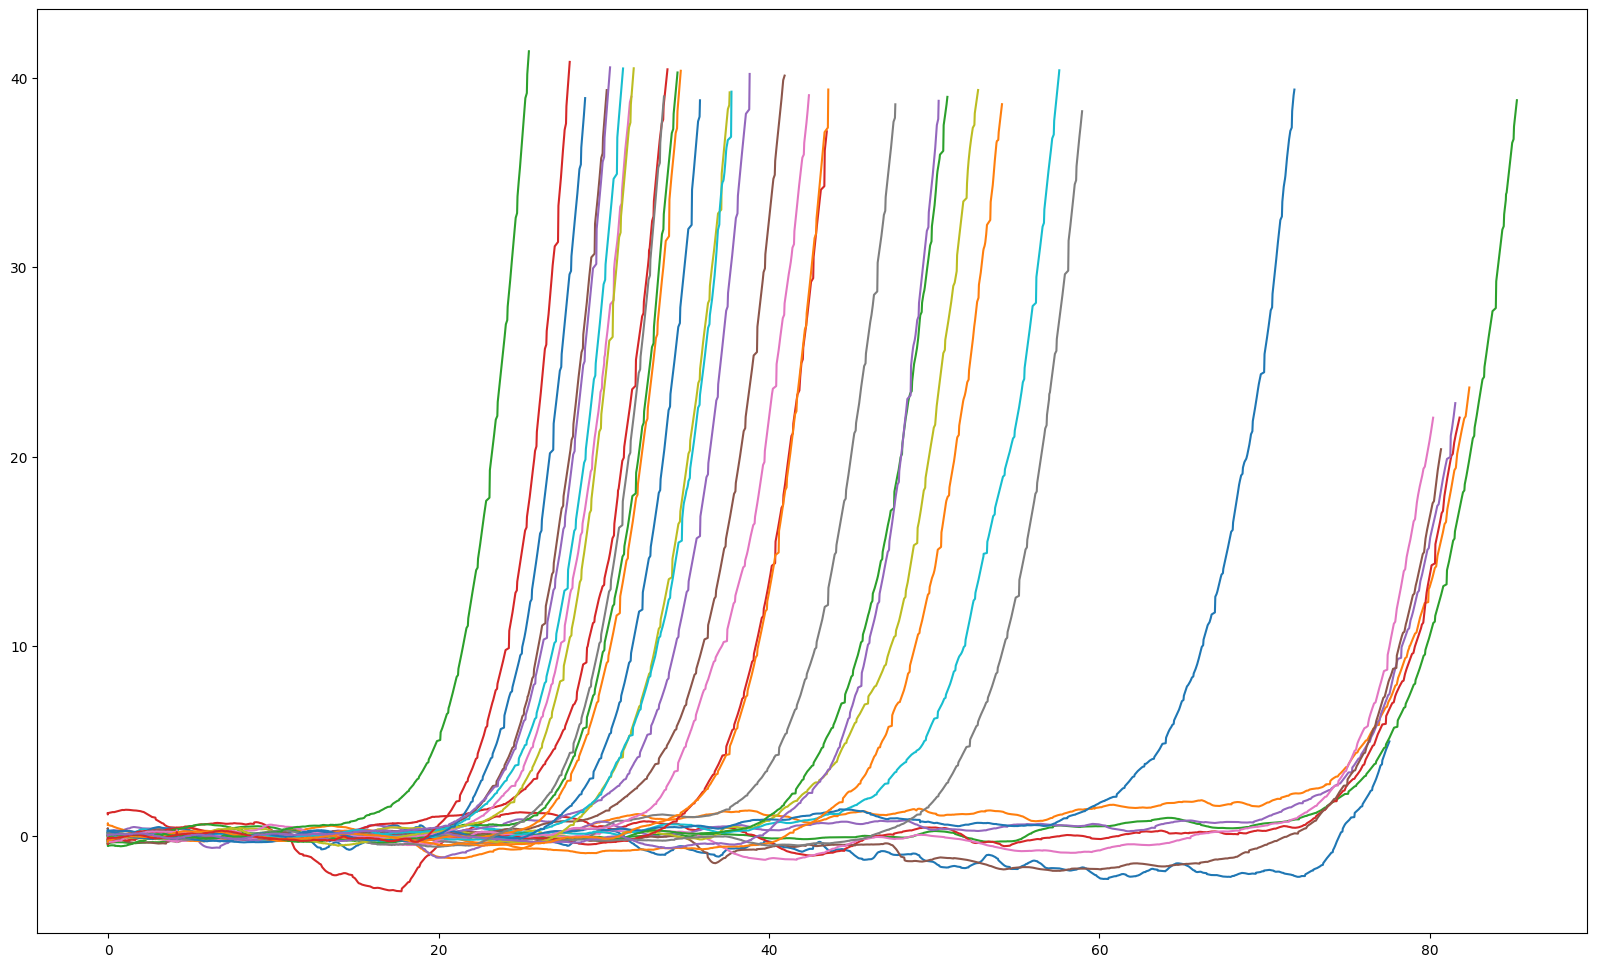

In [65]:
# Plots for raw data
df_raw_data_sorted = df_raw_data.sort_values(by=['Tesla', 'Angle', 'Current'], ascending=[True, True, True])

unique_tesla = sorted(df_raw_data['Tesla'].unique()) # Unique values for tesla
unique_angle = sorted(df_raw_data['Angle'].unique()) # Unique values for angle

print(unique_angle)
print(unique_tesla)

plt.figure(figsize=(20, 12))

for tesla in unique_tesla:
    for angle in unique_angle:

        df = df_raw_data_sorted.loc[(df_raw_data_sorted['Tesla'] == tesla) & (df_raw_data_sorted['Angle'] == angle)]

        if not df.empty:

            plt.plot(df['Current'], df['Fixed_Voltage'])





[0.0, 0.15, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6, 0.7]


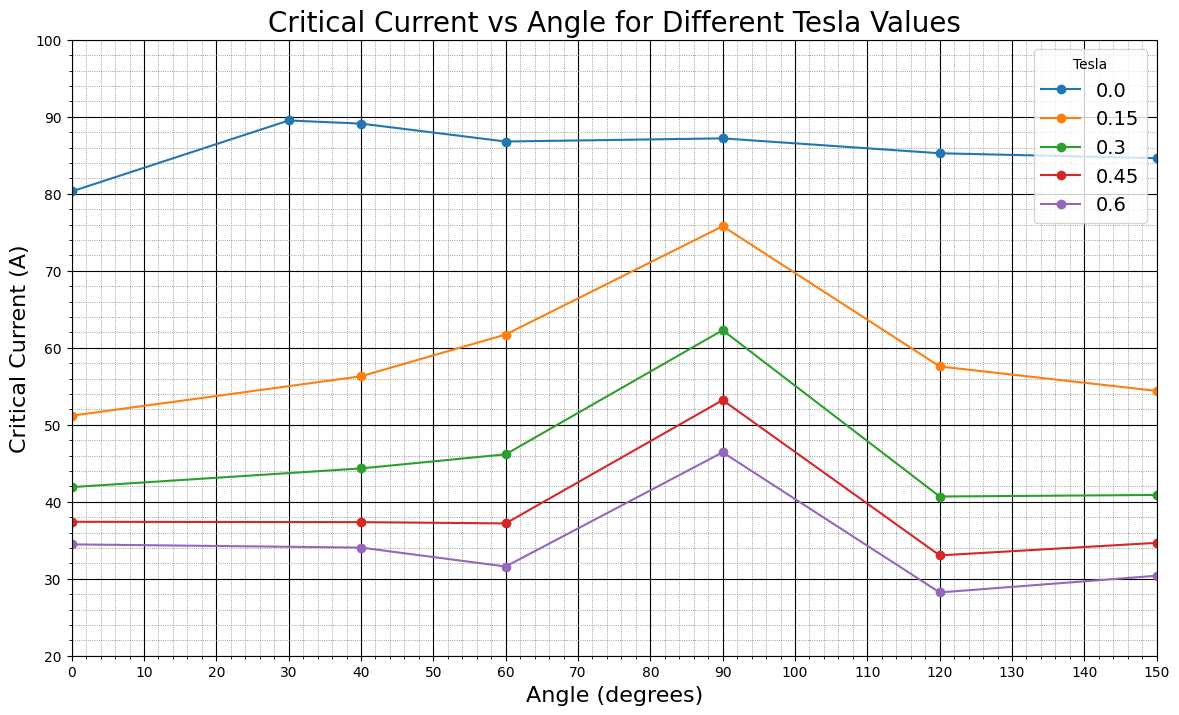

In [74]:
# Plot Field Angle vs Critical Current
# Get the unique Tesla values
unique_tesla = sorted(df_critical_current['Tesla'].unique())

print(unique_tesla)

df_critical_current_sorted = df_critical_current.sort_values(by=['Tesla', 'Angle'], ascending=[True, True])

polyfit_degree = 4

# Create a plot
plt.figure(figsize=(14, 8))

# List to store the labels in the desired order
handles, labels = [], []

# Loop through each unique Tesla value and plot the data
for tesla in unique_tesla:

    # Filter the data for the current Tesla value
    tesla_data = df_critical_current_sorted.loc[df_critical_current_sorted['Tesla'] == tesla]

    if len(tesla_data) > 3:

        # Sort the data by Angle to make the plot meaningful
        tesla_data_sorted = tesla_data.sort_values(by='Angle')

        # Check if there is more
        coefficients = np.polyfit(tesla_data['Angle'], tesla_data['Critical Current'], polyfit_degree)
        polynomial = np.poly1d(coefficients)

        x_fit = np.linspace(min(tesla_data['Angle']), max(tesla_data['Angle']), 1000)

        y_fit = polynomial(x_fit)

        # Scatter plot the data (Critical Current vs Angle)
        plt.plot(tesla_data_sorted['Angle'], tesla_data_sorted['Critical Current'], label=f'{tesla}', marker='o')
        # plt.plot(x_fit, y_fit)

# Adding labels and legend
plt.xlim((0, 150))  # x-axis from 0 to 150
plt.ylim((20, 100))  # y-axis from 20 to 100

# Set x and y ticks with proper ranges, ensuring they align with the axis limits
plt.xticks(range(0, 151, 10))  # x-axis ticks from 0 to 150, step 10
plt.yticks(range(20, 101, 10))  # y-axis ticks from 20 to 100, step 10

# Enable minor ticks
plt.minorticks_on()

# Title and axis labels with font size adjustments
plt.title('Critical Current vs Angle for Different Tesla Values', fontsize=20)
plt.xlabel('Angle (degrees)', fontsize=16)
plt.ylabel('Critical Current (A)', fontsize=16)

# Set the legend with a specific font size
plt.legend(title='Tesla', fontsize=14)

# Customize gridlines: major and minor
plt.grid(True, which='both')
plt.grid(which='major', color='black', linewidth=0.8)  # Major gridlines
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.6)  # Minor gridlines

# Save the figure as PNG with transparency, high DPI, and tight bounding box
plt.savefig('images/critical_current_angle.png', transparent=True, dpi=250, bbox_inches='tight')

# Display the plot
plt.show()